# Instruções para execução
Execute a célula a seguir e insira o código de verificação. 
Em seguida, CLONE a pasta a seguir para o SEU DRIVE com o mesmo nome no diretório "Meu Drive"

[Link para a pasta "Estatistica"](https://drive.google.com/drive/folders/1f1FrU-LruQr0fMfZV3YZSL3nA9YTWaUp?usp=sharing)


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pysal

In [ ]:
!pip install geopandas

In [ ]:
!pip install mapclassify

In [ ]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import geopandas as gpd 
from shapely import wkt
from shapely import geometry
from shapely.geometry import Point, base
import mapclassify
from matplotlib.pyplot import figure

In [ ]:
pd.options.display.max_rows = 300


Para acessar esses dados é importante que você tenha seguido as instruções para execução corretamente 

In [ ]:
raw = pd.read_csv('/content/drive/My Drive/Estatistica/dados-ms.csv', delimiter=";", encoding="latin1", usecols=['estado', 'municipio', 'evolucaoCaso', 'idade'])

In [ ]:
all_cities_df = raw.copy()

In [ ]:
#Aplicando filtros no dataFrame Cancelado, NaN e apenas do mato grosso do sul
case_filter_cancelado = all_cities_df[all_cities_df['evolucaoCaso'] == 'Cancelado'].index
all_cities_df.drop(case_filter_cancelado, inplace=True)
all_cities_df = all_cities_df.dropna(axis=0,how='all', subset=['evolucaoCaso'])
case_filter_ms = all_cities_df[all_cities_df['estado'] != 'MATO GROSSO DO SUL'].index
all_cities_df.drop(case_filter_ms, inplace=True)

Filtrando os casos com base na 'evolucaoCaso'

In [ ]:
# Separaremos o data frame all_cities_df em outros: Cura, internados na UTI, internados, óbitos e Em Tratamento domicilar 
# a principal razão dessa separação é a otimização do problema 
cure_cities_df = all_cities_df.loc[(all_cities_df['evolucaoCaso']) == 'Cura'] 
hospitalized_cities_df = all_cities_df.loc[(all_cities_df['evolucaoCaso']) == 'Internado']
hospitalizedICU_cities_df = all_cities_df.loc[(all_cities_df['evolucaoCaso']) == 'Internado em UTI']
death_cities_df = all_cities_df.loc[(all_cities_df['evolucaoCaso']) == 'Óbito']
home_treatment_cities_df =  all_cities_df.loc[(all_cities_df['evolucaoCaso']) == 'Em tratamento domiciliar']

Filtrando os geodados

In [ ]:
#Poligono do Brasil 
uf_br0 = gpd.read_file('/content/drive/My Drive/Estatistica/Files/gadm36_BRA_0.shp')
#Estados do Brasil 
uf_br1 = gpd.read_file('/content/drive/My Drive/Estatistica/Files/gadm36_BRA_1.shp')
#Municipios do Brasil
uf_br2 = gpd.read_file('/content/drive/My Drive/Estatistica/Files/gadm36_BRA_2.shp')
#Distritos do Brasil
uf_br3 = gpd.read_file('/content/drive/My Drive/Estatistica/Files/gadm36_BRA_3.shp')

#Filtrar o Estado do Mato Grosso do Sul 
uf_br1_ms = uf_br1[uf_br1.GID_1 == 'BRA.11_1']

#Filtrar os Municipios do Mato Grosso do Sul
uf_br2_ms = uf_br2[uf_br2.GID_1 == 'BRA.11_1']

#cidades do MS
uf_br2_ms_cities = uf_br2_ms[['NAME_2', 'geometry']]

Transformando o GeoDataFrame em um Pandas DataFrame

In [ ]:
#Agora, vamos criar um Pandas DataFrame a partir desse GeoPandas DataFrame
uf_br2_ms_cities = uf_br2_ms_cities.copy()
uf_br2_ms_cities_df = pd.DataFrame(uf_br2_ms_cities)

#Agora, vamos criar uma nova coluna no dataframe com os casos de covid, que vai relacionar o municipio e sua coordenada 
all_cities_df['geometry'] = 'NaN'  #incluir a coluna geometry, pois indexarei as coordenadas nela 

uf_br2_ms_cities_df.rename(columns={'NAME_2': 'municipio'}, inplace=True) # uniformizando os nomes no DataFrame

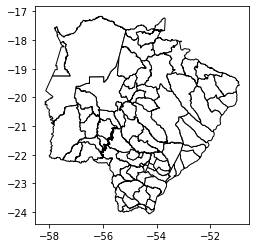

In [ ]:
# Com base nos nossos diferentes DataFrames, iremos plotar diferentes informações no estado do Mato Grosso do Sul 
# Definimos nossa base do mapa do estado
estado_ms = uf_br2_ms_cities.plot(color = 'white', edgecolor='black') 

cities = pd.read_csv('cidades.txt', delimiter=',')

campo_grande_coord = "POLYGON ((-54.1924324 -20.71139908, -54.17555237 -20.72563553, -54.17244339 -20.74953079, -54.1646347 -20.75556374, -54.15671921 -20.77349091, -54.1282196 -20.78775978, -54.11255264 -20.78559494, -54.0918541 -20.79759216, -54.08744049 -20.8094902, -54.06525421 -20.83542252, -54.02325439 -20.85506058, -54.01919174 -20.87704086, -54.00605392 -20.89386749, -54.00185394 -20.92590714, -53.99316406 -20.92913246, -53.97782516 -20.94946289, -53.96630859 -20.95656776, -53.95532608 -20.9600544, -53.94241333 -20.95625877, -53.91685486 -20.95802879, -53.91508484 -20.96137238, -53.9102211 -20.95815849, -53.90693665 -20.96447945, -53.88751984 -20.97963333, -53.8770256 -20.98262405, -53.86735535 -20.98089409, -53.86178589 -20.98557663, -53.85741043 -20.99016953, -53.85685349 -20.99917412, -53.84827805 -21.00632858, -53.84407425 -21.01630783, -53.85036087 -21.02063942, -53.84550095 -21.03124619, -53.84965897 -21.03874016, -53.84707642 -21.04290962, -53.83719254 -21.04828453, -53.83610916 -21.0520401, -53.82777786 -21.04960251, -53.82165909 -21.05680466, -53.82183456 -21.06213379, -53.81330109 -21.06385994, -53.80371475 -21.07308769, -53.77959824 -21.07074928, -53.76988983 -21.07444572, -53.76593399 -21.08030319, -53.75840759 -21.07972336, -53.75849152 -21.0891819, -53.75165939 -21.09404564, -53.75210571 -21.10196877, -53.74718094 -21.09975052, -53.73532104 -21.10740089, -53.73860931 -21.10895729, -53.73880005 -21.11660957, -53.73321533 -21.12245369, -53.73391342 -21.12587738, -53.7266655 -21.13087654, -53.7260704 -21.14416504, -53.70611191 -21.15589714, -53.7012291 -21.16629028, -53.69607162 -21.17259216, -53.68660736 -21.17592621, -53.6820488 -21.18849754, -53.6852684 -21.19952583, -53.68110657 -21.21818542, -53.68307877 -21.22372627, -53.67591095 -21.22985649, -53.67849731 -21.23702049, -53.66962814 -21.25231743, -53.67079926 -21.25806808, -53.66346741 -21.26377487, -53.65972137 -21.27807236, -53.64796829 -21.28899574, -53.64577484 -21.29926109, -53.64233017 -21.3011322, -53.64168549 -21.31298828, -53.63777161 -21.31764984, -53.6397438 -21.3275795, -53.63355255 -21.33102608, -53.63739777 -21.34009743, -53.633255 -21.34021378, -53.62421036 -21.3589325, -53.61657715 -21.36438751, -53.61713791 -21.37669945, -53.62080002 -21.38071251, -53.61833191 -21.38356972, -53.61556244 -21.38168907, -53.61751938 -21.4064827, -53.62223816 -21.40913773, -53.61732864 -21.41705704, -53.62657166 -21.42226982, -53.62416077 -21.43080902, -53.62690353 -21.4325695, -53.62604904 -21.43399239, -53.62421417 -21.43705177, -53.62913513 -21.44034195, -53.62607574 -21.44108963, -53.6278801 -21.4442749, -53.63457108 -21.44660568, -53.63885498 -21.45689964, -53.63232803 -21.45962143, -53.6385498 -21.46129036, -53.63648987 -21.4688797, -53.62182999 -21.47037315, -53.61244202 -21.47846031, -53.61791611 -21.48116875, -53.61327362 -21.48489571, -53.61349106 -21.49385452, -53.60837936 -21.49636269, -53.61001968 -21.5000782, -53.60660934 -21.50126266, -53.60960388 -21.51521492, -53.61807632 -21.5189743, -53.614048 -21.52076149, -53.61691284 -21.52458, -53.61344147 -21.52393341, -53.60460663 -21.53514671, -53.60929871 -21.53852654, -53.60596466 -21.54309464, -53.60996628 -21.54893112, -53.60015869 -21.5519619, -53.60546494 -21.56398582, -53.6088829 -21.56017494, -53.61059952 -21.56471062, -53.61351776 -21.56083488, -53.62116241 -21.57242012, -53.62896729 -21.57010078, -53.62927246 -21.5757103, -53.63861084 -21.5796051, -53.64368439 -21.57306862, -53.64188766 -21.56246948, -53.64522171 -21.56063271, -53.6538887 -21.56601715, -53.65721512 -21.55960274, -53.67127228 -21.56017303, -53.67465973 -21.55506706, -53.66713333 -21.5544014, -53.67192841 -21.5521183, -53.69490814 -21.55856514, -53.69932175 -21.5665493, -53.69543457 -21.57462502, -53.69994354 -21.58037758, -53.70305252 -21.5659771, -53.72441101 -21.57052994, -53.71738815 -21.57622528, -53.71866226 -21.58152199, -53.72363281 -21.57798004, -53.73398972 -21.57967758, -53.73838425 -21.58493996, -53.74385834 -21.58000755, -53.73712921 -21.57423592, -53.74052048 -21.56790733, -53.75613785 -21.5706234, -53.75702286 -21.57884407, -53.76185608 -21.58035851, -53.76897049 -21.56970406, -53.76824188 -21.55913544, -53.77266312 -21.56727982, -53.78268814 -21.56578445, -53.78319168 -21.56976509, -53.79619217 -21.56764412, -53.80060959 -21.563097, -53.81385803 -21.55894089, -53.81427383 -21.55296898, -53.82396698 -21.54463387, -53.82705307 -21.55661392, -53.83346939 -21.55810928, -53.83615875 -21.55293846, -53.83985519 -21.56148529, -53.84766006 -21.56712151, -53.86323929 -21.56111908, -53.87339401 -21.56543922, -53.8757782 -21.56578064, -53.87458801 -21.5596199, -53.88135147 -21.56108665, -53.88375092 -21.55594063, -53.89149475 -21.5568924, -53.92277145 -21.54114151, -53.94052124 -21.5461998, -53.94963455 -21.54467583, -53.95527649 -21.53744125, -53.96296692 -21.53772354, -53.96736145 -21.53072739, -53.97686005 -21.53463745, -53.98525238 -21.51580429, -53.99516296 -21.51016235, -54.00413895 -21.51290894, -54.00999832 -21.50875282, -54.00630188 -21.5019989, -54.00782394 -21.49809837, -54.01410675 -21.50111198, -54.02402878 -21.49274635, -54.02389145 -21.48938751, -54.03633118 -21.48556519, -54.03738785 -21.47636032, -54.04411316 -21.47534561, -54.04579926 -21.46775055, -54.05564117 -21.46593285, -54.06238556 -21.47040939, -54.06661224 -21.46953964, -54.0628624 -21.45899391, -54.0665741 -21.45502663, -54.07660675 -21.45029068, -54.08324432 -21.45293236, -54.08586502 -21.44258881, -54.09280777 -21.43853951, -54.10130692 -21.43888664, -54.10591888 -21.42759323, -54.10218811 -21.41935158, -54.11055756 -21.4161644, -54.10780334 -21.40770531, -54.11680984 -21.40381432, -54.12127686 -21.40771294, -54.13009644 -21.4029808, -54.13035965 -21.40259933, -54.13002396 -21.39730072, -54.14313889 -21.38535118, -54.14733124 -21.37455368, -54.15871811 -21.3638382, -54.17221832 -21.35723114, -54.17016983 -21.35279274, -54.17264175 -21.3494091, -54.18024826 -21.34807777, -54.18208313 -21.34455109, -54.1883049 -21.34660339, -54.18574905 -21.34038544, -54.19541168 -21.34037209, -54.2037735 -21.32167435, -54.20227051 -21.31685448, -54.20952606 -21.31542587, -54.20171738 -21.29939461, -54.22280502 -21.29849243, -54.21416855 -21.28644753, -54.23491669 -21.29119492, -54.23249817 -21.28666496, -54.23841858 -21.276371, -54.23649597 -21.26797295, -54.22579956 -21.2733078, -54.22386169 -21.25980568, -54.22819138 -21.25534058, -54.23377228 -21.26342583, -54.24499893 -21.25691414, -54.25106049 -21.25792503, -54.25432968 -21.2544899, -54.25080109 -21.24747658, -54.2575531 -21.24201012, -54.25891113 -21.23636246, -54.26511002 -21.24352455, -54.27277756 -21.23679924, -54.26652908 -21.2348423, -54.26663589 -21.22918892, -54.26111603 -21.22281837, -54.26086044 -21.20572281, -54.27455139 -21.19638824, -54.27280426 -21.18865013, -54.2674675 -21.18361855, -54.27327347 -21.18322182, -54.27966309 -21.17565918, -54.28447342 -21.17804527, -54.2884407 -21.17327881, -54.29522324 -21.17455864, -54.30572128 -21.1665287, -54.30347443 -21.16086769, -54.29841614 -21.16388512, -54.29169846 -21.15899277, -54.29833221 -21.15397835, -54.29230881 -21.14139748, -54.29957581 -21.13568306, -54.30494308 -21.13540459, -54.31050491 -21.12881088, -54.31517029 -21.13133049, -54.32108688 -21.1294384, -54.32961273 -21.11552429, -54.3397789 -21.11992264, -54.34597015 -21.11237526, -54.34122467 -21.10861778, -54.34550476 -21.1029911, -54.35097122 -21.10745239, -54.35461426 -21.10142899, -54.36100388 -21.1041069, -54.36875153 -21.10087585, -54.37547684 -21.10649681, -54.38177109 -21.10005951, -54.38327408 -21.08936119, -54.38741302 -21.08982277, -54.39130402 -21.08260536, -54.39001465 -21.07237434, -54.3950882 -21.06863213, -54.39383316 -21.06038094, -54.4011116 -21.06099319, -54.40880203 -21.05184555, -54.41827393 -21.05079269, -54.40925598 -21.04196358, -54.42964172 -21.03508377, -54.4255867 -21.02698517, -54.4279747 -21.02395248, -54.43375015 -21.02280807, -54.43508148 -21.02712059, -54.44963837 -21.02500725, -54.45632935 -21.01701355, -54.46211243 -21.01724052, -54.46363831 -21.00956154, -54.47478104 -21.01134682, -54.47566223 -21.00752449, -54.49191666 -21.00396156, -54.50409698 -20.99391365, -54.5066185 -20.99352264, -54.51678085 -20.99827003, -54.51863861 -20.99579048, -54.51974487 -20.98553467, -54.51469421 -20.98154831, -54.51688385 -20.97878075, -54.52844238 -20.97210693, -54.52575684 -20.96378136, -54.52783585 -20.95663452, -54.53386307 -20.95809746, -54.53655243 -20.96535683, -54.54217148 -20.96058273, -54.54580688 -20.96036148, -54.55925369 -20.94920158, -54.56639481 -20.94837189, -54.58233261 -20.92498016, -54.5894165 -20.92553329, -54.59041977 -20.91799545, -54.60491562 -20.91591263, -54.60063934 -20.91153145, -54.6024437 -20.90364647, -54.60678101 -20.90151978, -54.61450195 -20.90282631, -54.62116623 -20.91015625, -54.63564301 -20.90584755, -54.63718033 -20.88910294, -54.64477921 -20.8931942, -54.6558609 -20.89054108, -54.67266846 -20.88636017, -54.6709404 -20.89146042, -54.68392181 -20.88851929, -54.68294525 -20.87844276, -54.67578125 -20.87540817, -54.67566681 -20.86737061, -54.68016434 -20.87403679, -54.68514633 -20.87197495, -54.68314362 -20.86917305, -54.68414307 -20.86473656, -54.68814468 -20.86613655, -54.68738937 -20.85848236, -54.69572067 -20.85824966, -54.69219589 -20.85436249, -54.69775391 -20.84734726, -54.69300079 -20.84355545, -54.70350266 -20.83912277, -54.7048111 -20.83358192, -54.69580841 -20.82510757, -54.71120071 -20.82948112, -54.70881271 -20.8217411, -54.6968956 -20.81677055, -54.69958496 -20.8132, -54.69403458 -20.80904007, -54.70116806 -20.80587578, -54.70050049 -20.79941177, -54.69616699 -20.79665756, -54.70861053 -20.79140282, -54.69799805 -20.77952385, -54.69602585 -20.76992035, -54.70530319 -20.76580238, -54.70939255 -20.75765419, -54.70685959 -20.75521278, -54.70941925 -20.75287056, -54.71303177 -20.75498581, -54.710392 -20.74938965, -54.72047043 -20.74277496, -54.71741867 -20.7387085, -54.71963882 -20.73101234, -54.71255875 -20.72980309, -54.71320343 -20.72605515, -54.72336197 -20.71888542, -54.72369385 -20.71283722, -54.75078201 -20.69132805, -54.76636124 -20.69226265, -54.79180908 -20.71422195, -54.80434036 -20.73242378, -54.81631088 -20.73958588, -54.82275009 -20.77778816, -54.8251915 -20.74667168, -54.83036041 -20.72781372, -54.85422134 -20.68910027, -54.85017395 -20.68090439, -54.83879089 -20.67985725, -54.82741547 -20.67732048, -54.81442261 -20.65932655, -54.77675247 -20.64348602, -54.76542664 -20.62345695, -54.76544189 -20.61721611, -54.78100204 -20.60019112, -54.78830719 -20.57642937, -54.79458618 -20.56837463, -54.794487 -20.55908012, -54.78658295 -20.54722977, -54.79094696 -20.51997566, -54.78325272 -20.49765778, -54.77080917 -20.48262405, -54.76908875 -20.48091125, -54.76957321 -20.31887627, -54.76958084 -20.31636238, -54.77994919 -20.31420517, -54.77916718 -20.30508423, -54.78530121 -20.30798912, -54.79361725 -20.31084442, -54.82061386 -20.29932022, -54.81778717 -20.2947998, -54.82102585 -20.2827549, -54.83119583 -20.28532791, -54.84458542 -20.28136826, -54.8461647 -20.27779579, -54.85561371 -20.27922821, -54.85761261 -20.27560425, -54.88028336 -20.26595116, -54.88939667 -20.26741791, -54.90341568 -20.24854279, -54.91670227 -20.2458725, -54.92282486 -20.24775887, -54.91828156 -20.2428093, -54.91717148 -20.2330761, -54.92197418 -20.22940445, -54.91278076 -20.20653725, -54.90069962 -20.2087059, -54.89383698 -20.2039566, -54.88666534 -20.20817757, -54.87875748 -20.20735931, -54.86774445 -20.19746208, -54.86275101 -20.19875908, -54.85777664 -20.17999458, -54.86041641 -20.17431641, -54.84789276 -20.16718102, -54.83677673 -20.17239952, -54.82358932 -20.1659565, -54.81336594 -20.17402649, -54.80183029 -20.17382622, -54.7959404 -20.16968155, -54.78463745 -20.17375946, -54.78094482 -20.17186928, -54.7788353 -20.18107414, -54.77066803 -20.1906395, -54.74871826 -20.19275856, -54.74002457 -20.19961739, -54.73025131 -20.19863892, -54.7254715 -20.19338036, -54.71952438 -20.20239258, -54.70663834 -20.20335007, -54.67024994 -20.22278595, -54.66680908 -20.22200966, -54.65044403 -20.23487473, -54.64766693 -20.24851418, -54.6432991 -20.25292969, -54.63557816 -20.25123024, -54.61496735 -20.25718307, -54.60639572 -20.2506237, -54.53917694 -20.27260971, -54.51569366 -20.28619576, -54.50911331 -20.31139755, -54.49902725 -20.32836342, -54.49191666 -20.36050606, -54.49052048 -20.38872719, -54.47942352 -20.39415741, -54.44613266 -20.39671516, -54.43894196 -20.40535927, -54.42593765 -20.41095543, -54.41782379 -20.42217636, -54.39385986 -20.4253788, -54.38341904 -20.43117714, -54.37678146 -20.43733597, -54.37477875 -20.44710732, -54.36958694 -20.44820023, -54.36455536 -20.45570755, -54.36536026 -20.45993614, -54.3564415 -20.46582603, -54.34863281 -20.46796227, -54.33682632 -20.47758865, -54.32213974 -20.47763062, -54.31296921 -20.48181534, -54.30333328 -20.48070335, -54.29488373 -20.49323082, -54.27635956 -20.49098587, -54.25868988 -20.49591637, -54.24702835 -20.49150658, -54.24224854 -20.49437523, -54.24030304 -20.48799515, -54.2322464 -20.48466301, -54.22224426 -20.48776436, -54.21944046 -20.47772217, -54.21448898 -20.48233604, -54.21013641 -20.48179817, -54.20930862 -20.4776001, -54.19890976 -20.47799873, -54.18569565 -20.46525955, -54.18249893 -20.46927261, -54.18257904 -20.49019432, -54.19538116 -20.53752327, -54.19141006 -20.56061554, -54.17805481 -20.5962925, -54.18310928 -20.62046623, -54.19426727 -20.63773537, -54.19636154 -20.65811729, -54.20105362 -20.66073608, -54.20571899 -20.67432785, -54.20391464 -20.69605827, -54.1924324 -20.71139908))"

d = {'geometry':[campo_grande_coord], 'NAME_1':'Campo Grande'}
campo_grande_pd = pd.DataFrame(data=d)

In [ ]:
campo_grande_pd['geometry'] = gpd.GeoSeries.from_wkt(campo_grande_pd['geometry'])
campo_grande_pd = gpd.GeoDataFrame(campo_grande_pd, geometry='geometry')

points = campo_grande_pd.copy()
# mudar a geometria de campo grande, para os pontos 
points['geometry'] = points['geometry'].centroid

# Taxa de óbitos por municipios

Apos filtrarmos o dataFrame geral e separarmos a quantidade de óbitos, vamos percorrer o dataFrame e preencher com as coordenadas de cada ocorrencia. Em seguida, salvamos em um dataFrame e em um arquivo .txt
Isso é uma etapa que demanda muito tempo e memoria, por isso salvamos em um txt para todos os casos. Caso você nãoo queira executar essa célula, poderá executar a seguinte, geradora do gráfico. A célula geradora do gráfico só funcionará se você salvou em seu diretório a pasta do drive. 

In [ ]:
# Gera o mapa de mortes por COVID no estado do Mato grosso do Sul 
casos  = death_cities_df

casos['geometry'] = 'NaN'
# Para o dataFrame de óbitos 
for i in range(len(casos)):
  aux = casos.iloc[i, 1]
  for j in range(len(cities)):
    if(aux == cities.iloc[j, 0]):
        coord_aux = cities.iloc[j, 1]
        casos.iloc[i, 4] = coord_aux 

#tratar os casos em que nao tem conteudo na coluna
casos = casos.dropna(axis=0,how='all', subset=['geometry'])

# Descreve a quantidade de mortos por municipio 
quant_casos = casos['municipio'].value_counts()

quant_casos = pd.DataFrame(quant_casos)
quant_casos_total = quant_casos.sum() #Quantidade total
quant_casos['percent'] = 0
quant_casos['geometry'] = 'NaN'


for i in range(len(quant_casos)):
  quant_casos['percent'][i] = (quant_casos['municipio'][i]/quant_casos_total)*100

#print(casos)
#print(quant_casos)
for i in range(len(casos)):
  aux = casos.iloc[i, 1]
  for j in range(len(quant_casos)):
    if (aux == quant_casos.index[j]):
      aux2 = casos.iloc[i, 4]
      quant_casos.iloc[j, 2] = aux2
    
quant_casos = quant_casos.drop(["Ladário", "Paraíso das Águas"])

quant_casos.to_csv("obitos.txt", header=True, index=True)

Caso você tenha executado corretamente o ambiente do drive essa célula deverá funcionar.

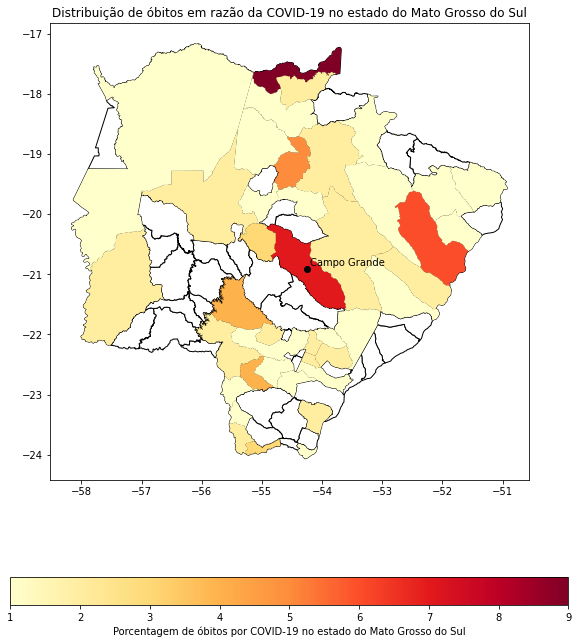

In [ ]:
quant_casos_death = pd.read_csv("/content/drive/My Drive/Estatistica/Data/obitos.txt", delimiter=",", encoding="latin1")

quant_casos = quant_casos_death.copy()
quant_casos['geometry'] = gpd.GeoSeries.from_wkt(quant_casos['geometry'])
gdf = gpd.GeoDataFrame(quant_casos, geometry='geometry')

estado_ms = uf_br2_ms_cities.plot(color = 'white', edgecolor='black', figsize=(10,12))
gdf.plot(ax=estado_ms, 
         column='percent', 
         legend=True, cmap='YlOrRd', 
         legend_kwds={'label': "Porcentagem de óbitos por COVID-19 no estado do Mato Grosso do Sul", 'orientation': "horizontal"})
plt.title("Distribuição de óbitos em razão da COVID-19 no estado do Mato Grosso do Sul")

points.plot(ax=estado_ms, color ='black', label='Campo Grande')
for x, y, label in zip(points.geometry.x, points.geometry.y, points.NAME_1):
    ax = estado_ms
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points",color='black')

plt.show()


# Taxa de internados por municipio

Apos filtrarmos o dataFrame geral e separarmos a quantidade de internados, vamos percorrer o dataFrame e preencher com as coordenadas de cada ocorrencia. Em seguida, salvamos em um dataFrame e em um arquivo .txt
Isso é uma etapa que demanda muito tempo e memoria, por isso salvamos em um txt para todos os casos. Caso você nãoo queira executar essa célula, poderá executar a seguinte, geradora do gráfico. A célula geradora do gráfico só funcionará se você salvou em seu diretório a pasta do drive. 

In [ ]:
# Gera o mapa de internados  por COVID no estado do Mato grosso do Sul 
casos  = hospitalized_cities_df

casos['geometry'] = 'NaN'
# Para o dataFrame de internados na UTI 
for i in range(len(casos)):
  aux = casos.iloc[i, 1]
  for j in range(len(cities)):
    if(aux == cities.iloc[j, 0]):
        coord_aux = cities.iloc[j, 1]
        casos.iloc[i, 4] = coord_aux 

#tratar os casos em que nao tem conteudo na coluna
casos = casos.dropna(axis=0,how='all', subset=['geometry'])

# Descreve a quantidade de internados por municipio 
quant_casos = casos['municipio'].value_counts()

quant_casos = pd.DataFrame(quant_casos)
quant_casos_total = quant_casos.sum() #Quantidade total
quant_casos['percent'] = 0
quant_casos['geometry'] = 'NaN'


for i in range(len(quant_casos)):
  quant_casos['percent'][i] = (quant_casos['municipio'][i]/quant_casos_total)*100

#print(casos)
#print(quant_casos)
for i in range(len(casos)):
  aux = casos.iloc[i, 1]
  for j in range(len(quant_casos)):
    if (aux == quant_casos.index[j]):
      aux2 = casos.iloc[i, 4]
      quant_casos.iloc[j, 2] = aux2
    
quant_casos = quant_casos.drop(["Ladário", "Batayporã"])

quant_casos.to_csv("internados.txt", header=True, index=True)


Caso você tenha executado corretamente o ambiente do drive essa célula deverá funcionar.

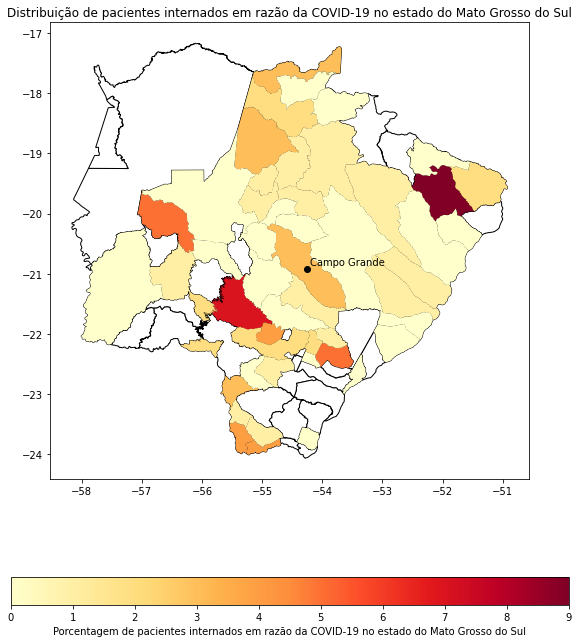

In [ ]:
quant_casos_hospitalized = pd.read_csv("/content/drive/My Drive/Estatistica/Data/internados.txt", delimiter=",", encoding="latin1")

quant_casos = quant_casos_hospitalized.copy()

quant_casos['geometry'] = gpd.GeoSeries.from_wkt(quant_casos['geometry'])
gdf = gpd.GeoDataFrame(quant_casos, geometry='geometry')

estado_ms = uf_br2_ms_cities.plot(color = 'white', edgecolor='black', figsize=(10,12))
gdf.plot(ax=estado_ms, 
         column='percent', 
         legend=True, 
         cmap='YlOrRd', 
         legend_kwds={'label': "Porcentagem de pacientes internados em razão da COVID-19 no estado do Mato Grosso do Sul", 'orientation': "horizontal"})
plt.title("Distribuição de pacientes internados em razão da COVID-19 no estado do Mato Grosso do Sul")

points.plot(ax=estado_ms, color ='black', label='Campo Grande')
for x, y, label in zip(points.geometry.x, points.geometry.y, points.NAME_1):
    ax = estado_ms
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points",color='black')
    
plt.show()

# Taxa de internados na UTI por municipio

Apos filtrarmos o dataFrame geral e separarmos a quantidade de internados, vamos percorrer o dataFrame e preencher com as coordenadas de cada ocorrencia. Em seguida, salvamos em um dataFrame e em um arquivo .txt
Isso é uma etapa que demanda muito tempo e memoria, por isso salvamos em um txt para todos os casos. Caso você nãoo queira executar essa célula, poderá executar a seguinte, geradora do gráfico. A célula geradora do gráfico só funcionará se você salvou em seu diretório a pasta do drive. 

In [ ]:
# Gera o mapa de internados na UTI por COVID no estado do Mato grosso do Sul 
casos  = hospitalizedICU_cities_df

casos['geometry'] = 'NaN'
# Para o dataFrame de internados na UTI 
for i in range(len(casos)):
  aux = casos.iloc[i, 1]
  for j in range(len(cities)):
    if(aux == cities.iloc[j, 0]):
        coord_aux = cities.iloc[j, 1]
        casos.iloc[i, 4] = coord_aux 

# tratar os casos em que nao tem conteudo na coluna
casos = casos.dropna(axis=0,how='all', subset=['geometry'])

# Descreve a quantidade de internados por municipio 
quant_casos = casos['municipio'].value_counts()

quant_casos = pd.DataFrame(quant_casos)
quant_casos_total = quant_casos.sum() #Quantidade total
quant_casos['percent'] = 0
quant_casos['geometry'] = 'NaN'

#Calculo da porcentagem
for i in range(len(quant_casos)):
  quant_casos['percent'][i] = (quant_casos['municipio'][i]/quant_casos_total)*100


for i in range(len(casos)):
  aux = casos.iloc[i, 1]
  for j in range(len(quant_casos)):
    if (aux == quant_casos.index[j]):
      aux2 = casos.iloc[i, 4]
      quant_casos.iloc[j, 2] = aux2
    
quant_casos = quant_casos.drop(["Figueirão"])

quant_casos.to_csv("internadosNaUTI.txt", header=True, index=True)

Caso você tenha executado corretamente o ambiente do drive essa célula deverá funcionar.

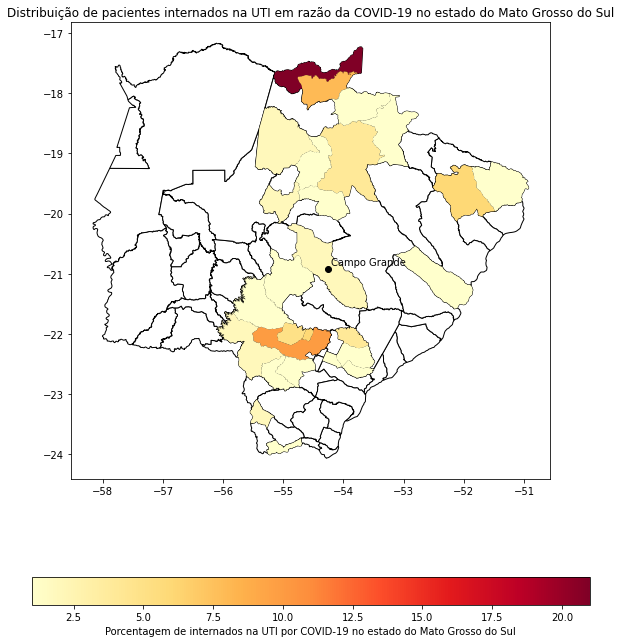

In [ ]:
quant_casos_hospitalizedICU = pd.read_csv("/content/drive/My Drive/Estatistica/Data/internadosnaUTI.txt", delimiter=",", encoding="latin1")
quant_casos = quant_casos_hospitalizedICU.copy()

quant_casos['geometry'] = gpd.GeoSeries.from_wkt(quant_casos['geometry'])
gdf = gpd.GeoDataFrame(quant_casos, geometry='geometry')

estado_ms = uf_br2_ms_cities.plot(color = 'white', edgecolor='black', figsize=(10,12))
gdf.plot(ax=estado_ms, 
         column='percent', 
         legend=True,cmap='YlOrRd', 
         legend_kwds={'label': "Porcentagem de internados na UTI por COVID-19 no estado do Mato Grosso do Sul", 'orientation': "horizontal"})
plt.title("Distribuição de pacientes internados na UTI em razão da COVID-19 no estado do Mato Grosso do Sul")

points.plot(ax=estado_ms, color ='black', label='Campo Grande')
for x, y, label in zip(points.geometry.x, points.geometry.y, points.NAME_1):
    ax = estado_ms
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points",color='black')
    
plt.show()

# Taxa de casos em Tratamento domicilar por municipio

Apos filtrarmos o dataFrame geral e separarmos a quantidade de internados, vamos percorrer o dataFrame e preencher com as coordenadas de cada ocorrencia. Em seguida, salvamos em um dataFrame e em um arquivo .txt
Isso é uma etapa que demanda muito tempo e memoria, por isso salvamos em um txt para todos os casos. Caso você nãoo queira executar essa célula, poderá executar a seguinte, geradora do gráfico. A célula geradora do gráfico só funcionará se você salvou em seu diretório a pasta do drive. 

In [ ]:
# Gera o mapa de casos de COVID em tratamento domicilar no estado do Mato grosso do Sul 
casos  = home_treatment_cities_df

casos['geometry'] = 'NaN'
# Para o dataFrame de internados na UTI 
for i in range(len(casos)):
  aux = casos.iloc[i, 1]
  for j in range(len(cities)):
    if(aux == cities.iloc[j, 0]):
        coord_aux = cities.iloc[j, 1]
        casos.iloc[i, 4] = coord_aux 

# tratar os casos em que nao tem conteudo na coluna
casos = casos.dropna(axis=0,how='all', subset=['geometry'])

# Descreve a quantidade de internados por municipio 
quant_casos = casos['municipio'].value_counts()


quant_casos = pd.DataFrame(quant_casos)
quant_casos_total = quant_casos.sum() #Quantidade total
quant_casos['percent'] = 0
quant_casos['geometry'] = 'NaN'

#Calculo da porcentagem
for i in range(len(quant_casos)):
  quant_casos['percent'][i] = (quant_casos['municipio'][i]/quant_casos_total)*100

for i in range(len(casos)):
  aux = casos.iloc[i, 1]
  for j in range(len(quant_casos)):
    if (aux == quant_casos.index[j]):
      aux2 = casos.iloc[i, 4]
      quant_casos.iloc[j, 2] = aux2
   
quant_casos = quant_casos.drop(["Figueirão", "Ladário", "Fátima do Sul", "Batayporã", "Paraíso das Águas"])
quant_casos.to_csv("casa.txt", header=True, index=True)

Gráfico de casos em tratamento domicilar a partir do txt.

Caso você tenha executado corretamente o ambiente do drive essa célula deverá funcionar.

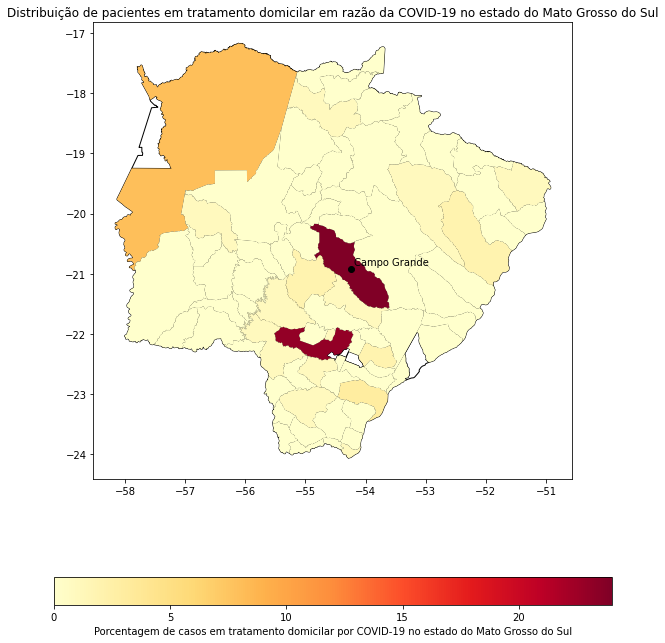

In [ ]:
quant_casos_hometreatment = pd.read_csv("/content/drive/My Drive/Estatistica/Data/casa.txt", delimiter=",", encoding="latin1")
quant_casos = quant_casos_hometreatment.copy()

quant_casos['geometry'] = gpd.GeoSeries.from_wkt(quant_casos['geometry'])
gdf = gpd.GeoDataFrame(quant_casos, geometry='geometry')

estado_ms = uf_br2_ms_cities.plot(color = 'white', edgecolor='black', figsize=(10,12))
gdf.plot(ax=estado_ms, 
         column='percent', 
         legend=True, 
         cmap='YlOrRd', 
         legend_kwds={'label': "Porcentagem de casos em tratamento domicilar por COVID-19 no estado do Mato Grosso do Sul", 'orientation': "horizontal"})
plt.title("Distribuição de pacientes em tratamento domicilar em razão da COVID-19 no estado do Mato Grosso do Sul")

points.plot(ax=estado_ms, color ='black', label='Campo Grande')
for x, y, label in zip(points.geometry.x, points.geometry.y, points.NAME_1):
    ax = estado_ms
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points",color='black')

plt.show()

#Taxa de cura por municipio




Apos filtrarmos o dataFrame geral e separarmos a quantidade de internados, vamos percorrer o dataFrame e preencher com as coordenadas de cada ocorrencia. Em seguida, salvamos em um dataFrame e em um arquivo .txt
Isso é uma etapa que demanda muito tempo e memoria, por isso salvamos em um txt para todos os casos. Caso você nãoo queira executar essa célula, poderá executar a seguinte, geradora do gráfico. A célula geradora do gráfico só funcionará se você salvou em seu diretório a pasta do drive. 
Para essa célula em especifico esse processo foi muito importante, visto que o mapeamento de casos curados gastou em média 1h30m a 2hrs de execução 

In [ ]:
# Gera o mapa de curados da  COVID-19 no estado do Mato grosso do Sul 
casos  = cure_cities_df

casos['geometry'] = 'NaN'
# Para o dataFrame de curados 
for i in range(len(casos)):
  aux = casos.iloc[i, 1]
  for j in range(len(cities)):
    if(aux == cities.iloc[j, 0]):
        coord_aux = cities.iloc[j, 1]
        casos.iloc[i, 4] = coord_aux 

# tratar os casos em que nao tem conteudo na coluna
casos = casos.dropna(axis=0,how='all', subset=['geometry'])

# Descreve a quantidade de curados por municipio 
quant_casos = casos['municipio'].value_counts()

quant_casos = pd.DataFrame(quant_casos)
quant_casos_total = quant_casos.sum() #Quantidade total
quant_casos['percent'] = 0
quant_casos['geometry'] = 'NaN'

#Calculo da porcentagem
for i in range(len(quant_casos)):
  quant_casos['percent'][i] = (quant_casos['municipio'][i]/quant_casos_total)*100

for i in range(len(casos)):
  aux = casos.iloc[i, 1]
  for j in range(len(quant_casos)):
    if (aux == quant_casos.index[j]):
      aux2 = casos.iloc[i, 4]
      quant_casos.iloc[j, 2] = aux2
   
quant_casos = quant_casos.drop(["Figueirão", "Ladário", "Fátima do Sul", "Batayporã", "Paraíso das Águas"])

#Gera o arquivo .txt da relação de curados e municipio, para otimização 
quant_casos.to_csv("cura_sem_exclusão.txt", header=True, index=True)


In [ ]:
quant_casos_cure = pd.read_csv("/content/drive/My Drive/Estatistica/Data/cura_sem_exclusão.txt", delimiter=",")

In [ ]:
filtro = quant_casos_cure[quant_casos_cure['Unnamed: 0'] == 'Rio de Janeiro'].index
quant_casos_cure.drop(filtro, inplace=True)


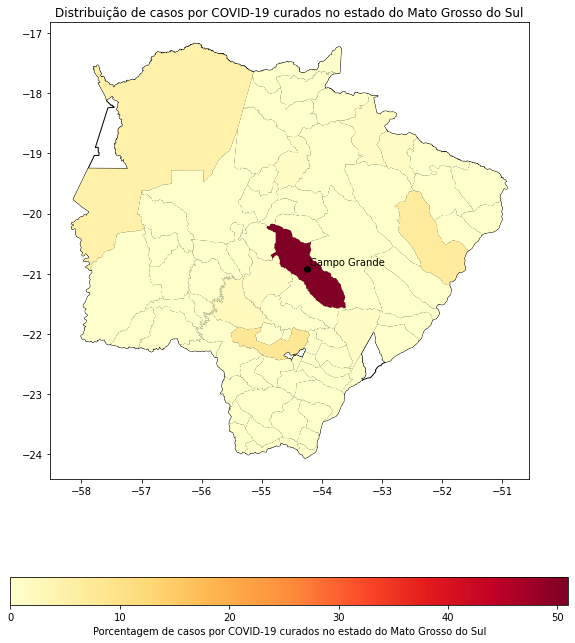

In [ ]:
quant_casos = quant_casos_cure.copy()

quant_casos['geometry'] = gpd.GeoSeries.from_wkt(quant_casos['geometry'])
gdf = gpd.GeoDataFrame(quant_casos, geometry='geometry')

estado_ms = uf_br2_ms_cities.plot(color = 'white', edgecolor='black', figsize=(10,12))
gdf.plot(ax=estado_ms, 
         column='percent', 
         legend=True, 
         cmap='YlOrRd', 
         legend_kwds={'label': "Porcentagem de casos por COVID-19 curados no estado do Mato Grosso do Sul", 'orientation': "horizontal"})
plt.title("Distribuição de casos por COVID-19 curados no estado do Mato Grosso do Sul")

points.plot(ax=estado_ms, color ='black', label='Campo Grande')
for x, y, label in zip(points.geometry.x, points.geometry.y, points.NAME_1):
    ax = estado_ms
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points",color='black')

plt.show()

# Taxa total 

Agora, podemos juntar todos os dataFrames filtrados, assim saberemos a distribuição total de casos de COVI-19 ao longo do estado do Mato Grosso do Sul. Nessa etapa vamos analisar a distribuição **absoluta** de casos ao longo do estado do Mato Grosso do Sul. 

In [ ]:
#Leitura de todos os DataFrames armazenados nos txts previamente criados 
cure_df = pd.read_csv("cura_sem_exclusão.txt", delimiter=",")
death_df = pd.read_csv("obitos.txt", delimiter=",")
hospitalized_df = pd.read_csv("internados.txt", delimiter=",")
hospitalizedICU_df = pd.read_csv("internadosNaUTI.txt", delimiter=",")
home_treatment_df = pd.read_csv("casa.txt", delimiter=",")

#manipulação dos nomes
cure_df.rename(columns={'Unnamed: 0':'cidade'}, inplace=True)
cure_df.rename(columns={'municipio':'quant'}, inplace=True)
death_df.rename(columns={'Unnamed: 0':'cidade'}, inplace=True)
death_df.rename(columns={'municipio':'quant'}, inplace=True)
hospitalized_df.rename(columns={'Unnamed: 0':'cidade'}, inplace=True)
hospitalized_df.rename(columns={'municipio':'quant'}, inplace=True)
home_treatment_df.rename(columns={'Unnamed: 0':'cidade'}, inplace=True)
home_treatment_df.rename(columns={'municipio':'quant'}, inplace=True)
hospitalizedICU_df.rename(columns={'Unnamed: 0':'cidade'}, inplace=True)
hospitalizedICU_df.rename(columns={'municipio':'quant'}, inplace=True)

Criamos um novo DataFrame "all_cases_df" que irá armazenar a soma de todos os casos já mapeados 

In [ ]:
all_cases_df = cure_df.copy()
all_cases_df.rename(columns={'cidade':'municipio'}, inplace=True)

In [ ]:
for i in range(len(cure_df)):
  aux = cure_df['cidade'][i]
  for j in range(len(hospitalizedICU_df)):
    if(aux == hospitalizedICU_df['cidade'][j]):
      aux2 = hospitalizedICU_df['quant'][j]
      cure_df['quant'][i] = aux2 + cure_df.iloc[i, 1]

In [ ]:
for i in range(len(cure_df)):
  aux = cure_df['cidade'][i]
  for j in range(len(death_df)):
    if(aux == death_df['cidade'][j]):
      aux2 = death_df['quant'][j]
      cure_df['quant'][i] = aux2 + cure_df.iloc[i, 1]

In [ ]:
for i in range(len(cure_df)):
  aux = cure_df['cidade'][i]
  for j in range(len(hospitalized_df)):
    if(aux == hospitalized_df['cidade'][j]):
      aux2 = hospitalized_df['quant'][j]
      cure_df['quant'][i] = aux2 + cure_df.iloc[i, 1]

In [ ]:
for i in range(len(cure_df)):
  aux = cure_df['cidade'][i]
  all_cases_df['municipio'][i] = aux
  for j in range(len(home_treatment_df)):
    if(aux == home_treatment_df['cidade'][j]):
      aux2 = home_treatment_df['quant'][j]
      all_cases_df['quant'][i] = aux2 + cure_df.iloc[i, 1]

Armazenamos os novos dados (somados) em um novo documento, "todos.txt"

In [ ]:
all_cases_df.to_csv("todos.txt", header=True, index=True)
quant_casos_total = all_cases_df.copy()

In [ ]:
filtro = all_cases_df[all_cases_df['municipio'] == 'Rio de Janeiro'].index
all_cases_df.drop(filtro, inplace=True)

In [ ]:
filtro2 = quant_casos_total[quant_casos_total['municipio'] == 'Rio de Janeiro'].index
quant_casos_total.drop(filtro, inplace=True)

In [ ]:
# Transformação do conteudo da coluna 'geometry', que continha floats para o tipo "POLYGON ", legivel para o GeoPandas
all_cases_df['geometry'] = gpd.GeoSeries.from_wkt(all_cases_df['geometry'])

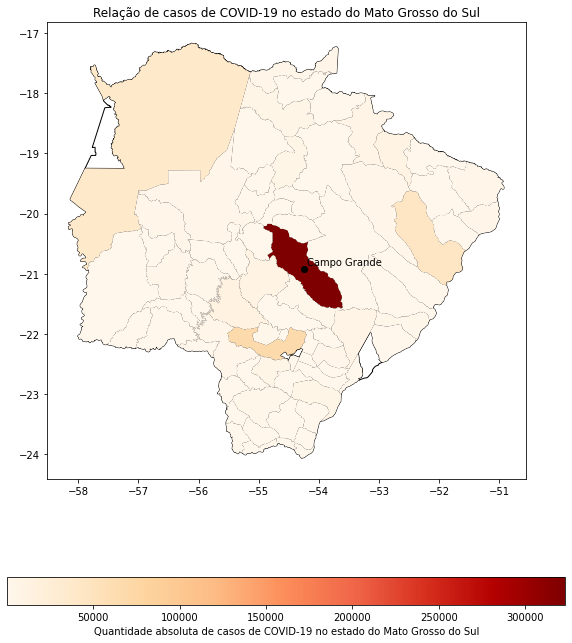

In [ ]:
gdf = gpd.GeoDataFrame(all_cases_df, geometry='geometry')

estado_ms = uf_br2_ms_cities.plot(color = 'white', edgecolor='black', figsize=(10,12))
gdf.plot(ax=estado_ms, 
         legend=True,
         column='quant',
         #edgecolor='k',
         cmap='OrRd',
         legend_kwds={'label': "Quantidade absoluta de casos de COVID-19 no estado do Mato Grosso do Sul", 'orientation': "horizontal"}
         )

points.plot(ax=estado_ms, color ='black', label='Campo Grande')
for x, y, label in zip(points.geometry.x, points.geometry.y, points.NAME_1):
    ax = estado_ms
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points",color='black')
plt.title("Relação de casos de COVID-19 no estado do Mato Grosso do Sul")
plt.show()

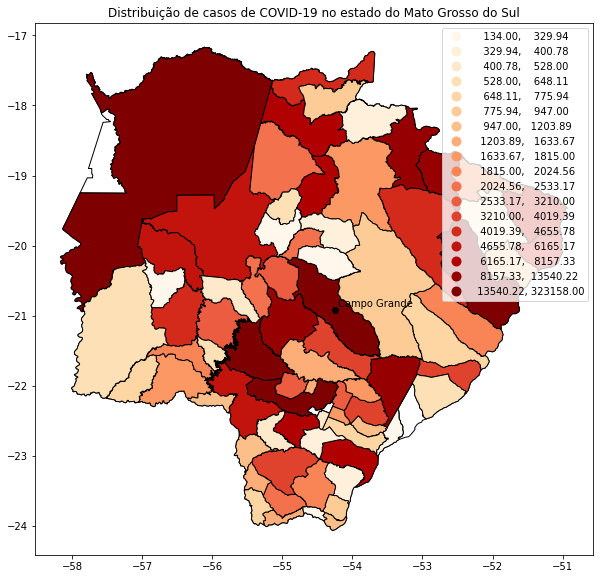

In [ ]:
gdf = gpd.GeoDataFrame(all_cases_df, geometry='geometry')

estado_ms = uf_br2_ms_cities.plot(color = 'white', edgecolor='black', figsize=(10,12))
gdf.plot(ax=estado_ms, 
         legend=True,
         column='quant',
         edgecolor='k',
         scheme='quantiles', k = 18,
         cmap='OrRd',
         label= "Quantidade absoluta de casos de COVID-19 no estado do Mato Grosso do Sul",
         )

points.plot(ax=estado_ms, color ='black', label='Campo Grande')
for x, y, label in zip(points.geometry.x, points.geometry.y, points.NAME_1):
    ax = estado_ms
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points",color='black')

plt.title("Distribuição de casos de COVID-19 no estado do Mato Grosso do Sul")
plt.show()

#Analises de quantidade de casos por população 

Nessa análise, iremos calcular a quantidade de casos total em relação a população total de cada municipio. 

[População de cada municipio do Mato Grosso do Sul](https://pt.wikipedia.org/wiki/Lista_de_municípios_de_Mato_Grosso_do_Sul_por_população) está baseada na estimativa de 2020 do IBGE.



In [ ]:
popdf = pd.read_csv('/content/drive/My Drive/Estatistica/Data/cidade_pop_coord.txt', delimiter=',')

In [ ]:
pop_cases_df = popdf.merge(all_cases_df, left_on='municipio', right_on='municipio')

In [ ]:
pop_cases_df.rename(columns={'geometry_x':'geometry'}, inplace=True)
pop_cases_df=pop_cases_df.drop(columns='geometry_y')

A porcentagem foi calculada com base $\frac{\text{Casos de COVID no municipio X}}{\text{População do municipio X}}$

In [ ]:
for i in range(len(pop_cases_df)):
  aux = pop_cases_df['quant'][i]
  pop_cases_df['População'][i] = pop_cases_df['População'][i]*1000
  percent_aux = (aux / pop_cases_df['População'][i]*100)
  pop_cases_df['percent'][i] = percent_aux

Ordenação do dataFrame da maior porcentagem relativa para a menor, para facilitra a visualização 

In [ ]:
pop_cases_df = pop_cases_df.sort_values(by=['percent'], ascending=False)

In [ ]:
pop_cases_df['geometry'] = gpd.GeoSeries.from_wkt(pop_cases_df['geometry'])

Conversão das coordenadas de Campo Grande de Poligono para Pontos 

/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:235: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:237: UserWarning: Warning: setting k to 19
  Warn("Warning: setting k to %d" % k_q, UserWarning)


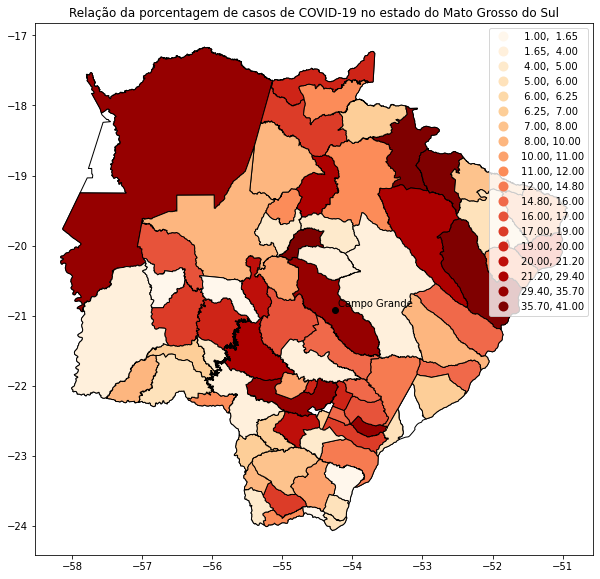

In [ ]:
gdf = gpd.GeoDataFrame(pop_cases_df, geometry='geometry')

estado_ms = uf_br2_ms_cities.plot(color = 'white', edgecolor='black', figsize=(10,12))
gdf.plot(ax=estado_ms, 
         legend=True,
         column='percent',
         edgecolor='k',
         scheme='quantiles', k = 20,
         cmap='OrRd',
         label="Porcentagem de casos de COVID-19 no estado do Mato Grosso do Sul",
         #legend_kwds={'label': "Porcentagem de casos de COVID-19 no estado do Mato Grosso do Sul", 'orientation': "horizontal"}
         )

points.plot(ax=estado_ms, color ='black', label='Campo Grande')
for x, y, label in zip(points.geometry.x, points.geometry.y, points.NAME_1):
    ax = estado_ms
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points",color='black')

plt.title("Relação da porcentagem de casos de COVID-19 no estado do Mato Grosso do Sul")
plt.show()

# Conclusões sobre os dados 
 A principal pergunta, ao analisar a distribuição de casos de COVID-19 no estado do Mato Grosso do Sul, é se a quantidade de casos se dava em razão da proximidade ou não da capital Campo Grande. 
A conclusão foi de que sim: a região central do Mato Grosso do Sul concentrava a maior quantidade de casos totais, contaminação em relação a população total, internações e óbitos. 

In [ ]:
pop_cases_df.head(10)

,Unnamed: 0,municipio,geometry,Posição,População,quant,percent
25,25,Costa Rica,"POLYGON ((-53.04266739 -18.73036194, -53.03792...",33,21142.0,8827,41
62,62,Rochedo,"POLYGON ((-54.91278076 -20.20653725, -54.91702...",74,5079.0,2042,40
21,21,Chapadão do Sul,"POLYGON ((-52.44103241 -19.33679962, -52.43873...",20,25865.0,10169,39
72,72,Três Lagoas,"POLYGON ((-51.62509918 -20.87339973, -51.61342...",3,123281.0,45742,37
18,18,Campo Grande,"POLYGON ((-54.1924324 -20.71139908, -54.175552...",1,906092.0,323158,35
24,24,Corumbá,"POLYGON ((-57.62990952 -20.65131378, -57.63298...",4,112058.0,37924,33
52,52,Novo Horizonte do Sul,"POLYGON ((-53.49765778 -22.58668709, -53.50266...",77,3684.0,1106,30
30,30,Dourados,"POLYGON ((-54.96448517 -22.36423683, -54.97584...",2,225495.0,68906,30
45,45,Maracaju,"POLYGON ((-55.29290771 -21.90341949, -55.29339...",10,48022.0,13731,28
0,0,Água Clara,"POLYGON ((-52.79271317 -19.87020111, -52.78859...",40,15776.0,4487,28


Os poucos municipios que aparecem entre as 10 maiores taxas de contaminação relativa e não estão na região central do Mato Grosso do Sul são municipios classificados como "polos turisticos", como por exemplo: Costa Rica, Corumbá, e Bonito. 

[Noticias sobre a Pandemia em Costa Rica](https://www.enfoquems.com.br/decreto-prorroga-calamidade-publica-em-costa-rica-ate-31-de-dezembro/)
